# Purpose
Predict survivability for titanic passengers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train dataset EDA

In [2]:
filepath = 'C:/Users/nowic/Desktop/home_tasks/pets/titanic/feather_data/'

titanic_train = pd.read_feather(f'{filepath}titanic_train.feather')
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [71]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

## describe()

In [72]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Survived

([<matplotlib.patches.Wedge at 0x262e7231f70>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Dead'),
  Text(0.40328162306972465, -1.0555870084906542, 'Survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.62% (549)'),
  Text(0.2248384270211739, -0.5885131109284178, '38.38% (342)')])

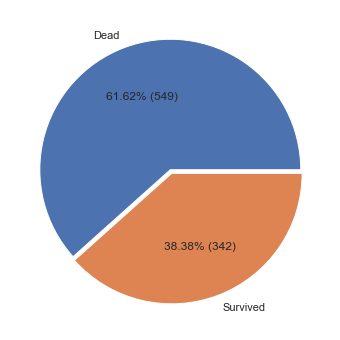

In [73]:
surv_count = titanic_train.groupby('Survived').agg({'Name': 'count'}).rename(columns={'Name': 'Count'})

plt.pie(x=surv_count['Count'],
        explode=[0, 0.03],
        labels=['Dead', 'Survived'],
        autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, (p/100)*titanic_train.groupby('Survived').size().sum()))

## Embarked

([<matplotlib.patches.Wedge at 0x262e7282460>,
 [Text(0.9242054877476974, 0.6237541313827435, 'C'),
  Text(0.12386146848567248, 1.1080989742006682, 'Q'),
  Text(-0.7225602849401345, -0.8491946977149776, 'S')],
 [Text(0.5097635649908824, 0.3440437585653697, '18.90% (168)'),
  Text(0.06831820907505701, 0.6111936046039559, '8.66% (77)'),
  Text(-0.3985422199445584, -0.4683899005333732, '72.44% (644)')])

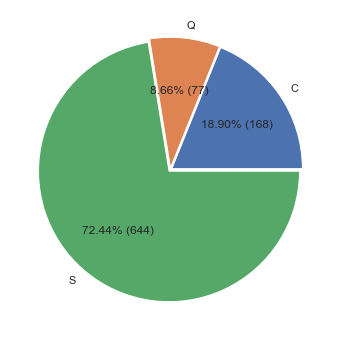

In [74]:
embarked_count = titanic_train.groupby('Embarked', as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})

plt.pie(x=embarked_count['Count'],
        explode=[0.015, 0.015, 0.015],
        labels=embarked_count['Embarked'],
        autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, (p/100)*titanic_train.groupby('Embarked').size().sum()))

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

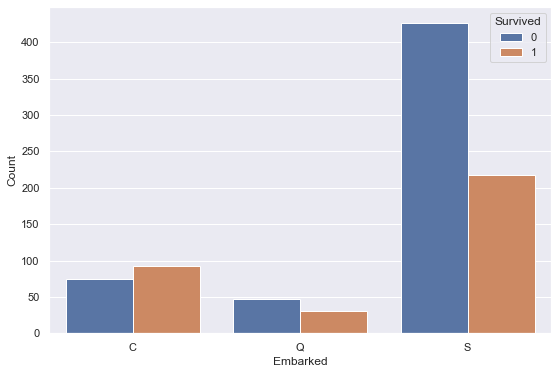

In [75]:
embarked_surv = titanic_train.groupby(['Survived', 'Embarked'], as_index=False)\
        .agg({'Name': 'count'})\
        .rename(columns={'Name': 'Count'})

sns.set(rc={'figure.figsize': (9, 6)})
sns.barplot(x='Embarked', y='Count', hue='Survived', data=embarked_surv)

## Age

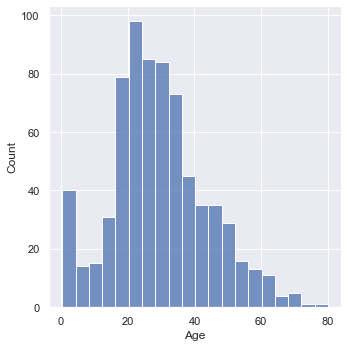

In [76]:
sns.displot(data=titanic_train['Age'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

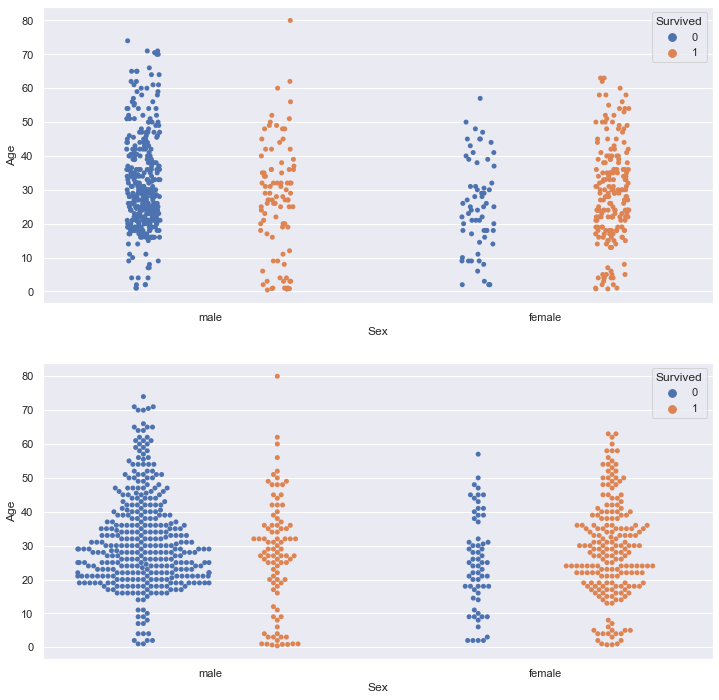

In [77]:
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
sns.stripplot(x='Sex', y='Age', hue='Survived', dodge=True, data=titanic_train, ax=axes[0])
sns.swarmplot(x='Sex', y='Age', hue='Survived', dodge=True, data=titanic_train, ax=axes[1])

## Fare

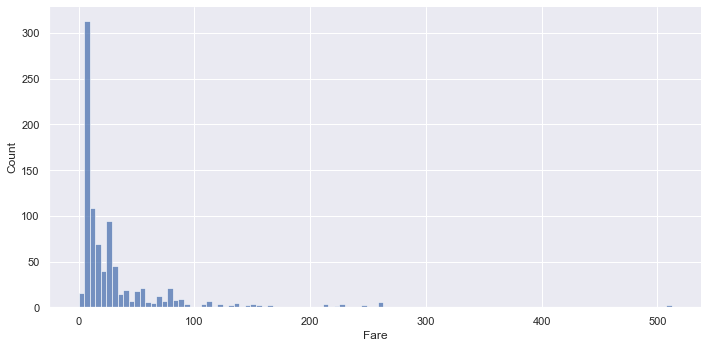

In [78]:
sns.displot(data=titanic_train['Fare'], aspect=2)

## SibSp

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

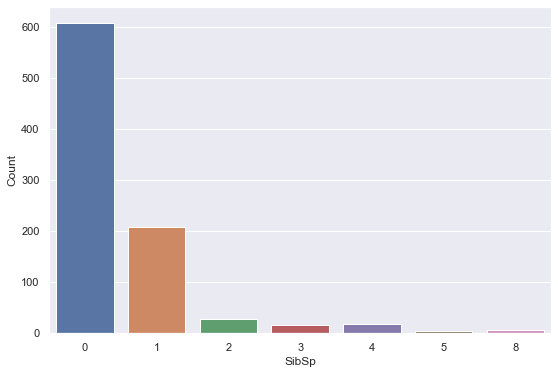

In [79]:
sibsp_count = titanic_train.groupby('SibSp', as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})
# sns.set(rc={'figure.figsize': (12, 12)})
#
# plt.pie(x=sibsp_count['Count'],
#         explode=[0, 0, 0, 0, 0, 0.2, 0.2],
#         labels=sibsp_count['SibSp'],
#         autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, (p/100)*titanic_train.groupby('SibSp').size().sum()))
sns.barplot(x=sibsp_count['SibSp'], y=sibsp_count['Count'])

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

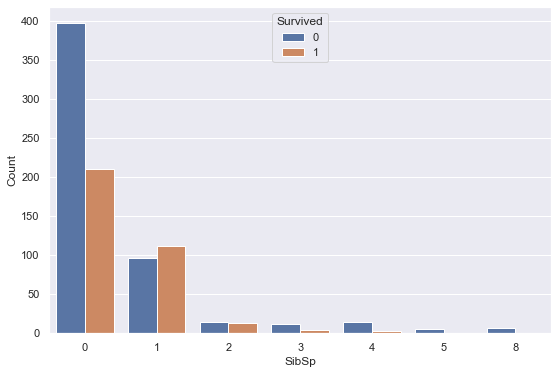

In [80]:
sibsp_surv = titanic_train.groupby(['Survived', 'SibSp'], as_index=False)\
        .agg({'Name': 'count'})\
        .rename(columns={'Name': 'Count'})

sns.set(rc={'figure.figsize': (9, 6)})
sns.barplot(x='SibSp', y='Count', hue='Survived', data=sibsp_surv)

## Parch

<AxesSubplot:xlabel='Parch', ylabel='Count'>

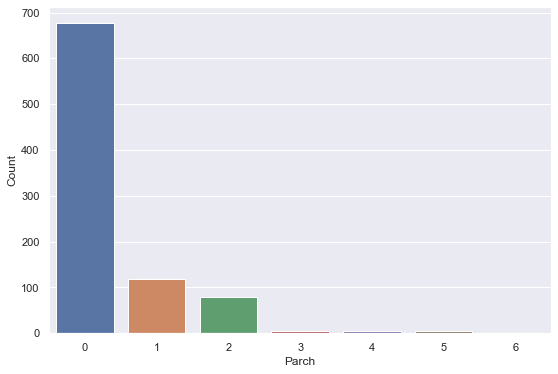

In [81]:
parch_count = titanic_train.groupby('Parch', as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})
# sns.set(rc={'figure.figsize': (12, 12)})
#
# plt.pie(x=parch_count['Count'],
#         explode=[0, 0, 0, 0, 0, 0.2, 0.2],
#         labels=parch_count['Parch'],
#         autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, (p/100)*titanic_train.groupby('Parch').size().sum()))
sns.barplot(x=parch_count['Parch'], y=parch_count['Count'])

<AxesSubplot:xlabel='Parch', ylabel='Count'>

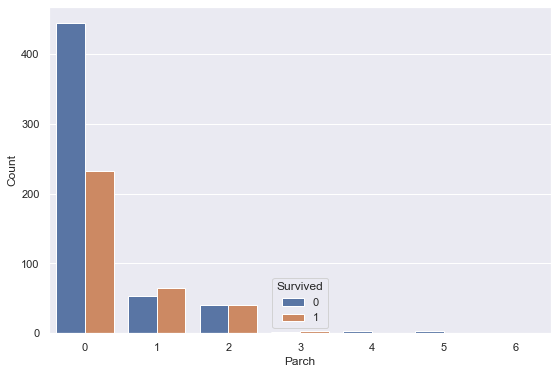

In [82]:
parch_surv = titanic_train.groupby(['Survived', 'Parch'], as_index=False)\
        .agg({'Name': 'count'})\
        .rename(columns={'Name': 'Count'})

sns.set(rc={'figure.figsize': (9, 6)})
sns.barplot(x='Parch', y='Count', hue='Survived', data=parch_surv)

## Sex

([<matplotlib.patches.Wedge at 0x262e8b8f8b0>,
 [Text(0.4986536668583928, 0.9972810639577386, 'female'),
  Text(-0.4986535734861991, -0.9972811106450598, 'male')],
 [Text(0.27504215705642293, 0.5500698245148065, '35.24% (314)'),
  Text(-0.27504210555516806, -0.5500698502661091, '64.76% (577)')])

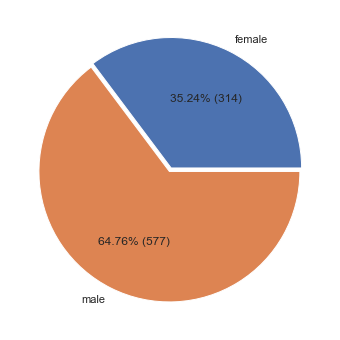

In [83]:
sex_count = titanic_train.groupby('Sex', as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})

plt.pie(x=sex_count['Count'],
        explode=[0.015, 0.015],
        labels=sex_count['Sex'],
        autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, (p/100)*titanic_train.groupby('Pclass').size().sum()))

<AxesSubplot:xlabel='Sex', ylabel='Count'>

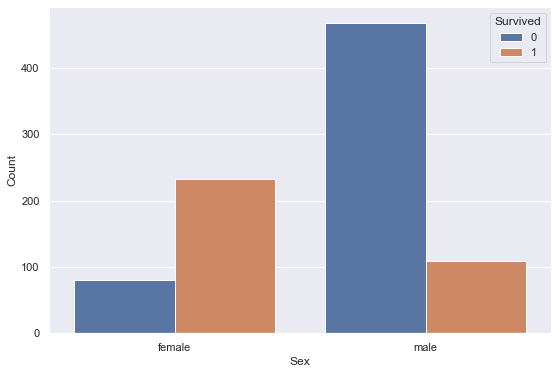

In [84]:
sex_surv = titanic_train.groupby(['Survived', 'Sex'], as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})
sns.barplot(x='Sex', y='Count', data=sex_surv, hue='Survived')

## Pclass

([<matplotlib.patches.Wedge at 0x262e8c43550>,
 [Text(0.8069634350229121, 0.7694381161185234, '1'),
  Text(-0.6306517240929054, 0.9195125898532582, '2'),
  Text(-0.17811219359158015, -1.1006820823898222, '3')],
 [Text(0.44509642380187525, 0.4243986021640286, '24.24% (216)'),
  Text(-0.34784826037411365, 0.5071751056141289, '20.65% (184)'),
  Text(-0.09824125476127514, -0.6071026732464042, '55.11% (491)')])

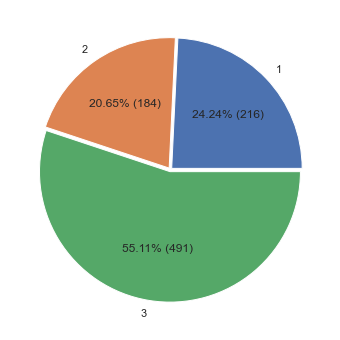

In [85]:
pclass_count = titanic_train.groupby('Pclass', as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})

plt.pie(x=pclass_count['Count'],
        explode=[0.015, 0.015, 0.015],
        labels=pclass_count['Pclass'],
        autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, (p/100)*titanic_train.groupby('Pclass').size().sum()))

<AxesSubplot:xlabel='Survived', ylabel='Count'>

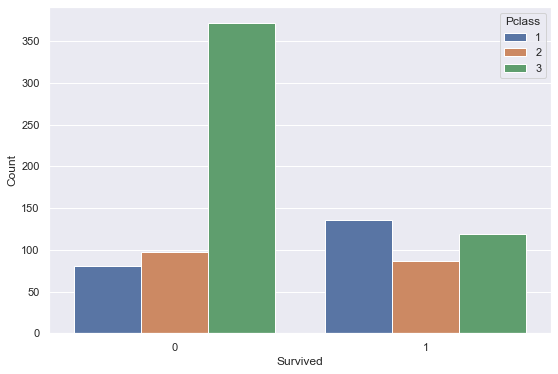

In [86]:
pclass_surv = titanic_train.groupby(['Pclass', 'Survived'], as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})
sns.barplot(x='Survived', y='Count', data=pclass_surv, hue='Pclass')

## Sex + Pclass

In [87]:
sex_pclass_surv = titanic_train.groupby(['Sex', 'Pclass', 'Survived'], as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})
sex_pclass_surv

,Sex,Pclass,Survived,Count
0,female,1,0,3
1,female,1,1,91
2,female,2,0,6
3,female,2,1,70
4,female,3,0,72
5,female,3,1,72
6,male,1,0,77
7,male,1,1,45
8,male,2,0,91
9,male,2,1,17


In [88]:
female_pclass_surv = sex_pclass_surv.query('Sex == "female"')
female_pclass_surv = female_pclass_surv.drop('Sex', axis=1)
female_pclass_surv

,Pclass,Survived,Count
0,1,0,3
1,1,1,91
2,2,0,6
3,2,1,70
4,3,0,72
5,3,1,72


In [89]:
male_pclass_surv = sex_pclass_surv.query('Sex == "male"')
male_pclass_surv = male_pclass_surv.drop('Sex', axis=1)
male_pclass_surv

,Pclass,Survived,Count
6,1,0,77
7,1,1,45
8,2,0,91
9,2,1,17
10,3,0,300
11,3,1,47


Text(0.5, 1.0, 'Male')

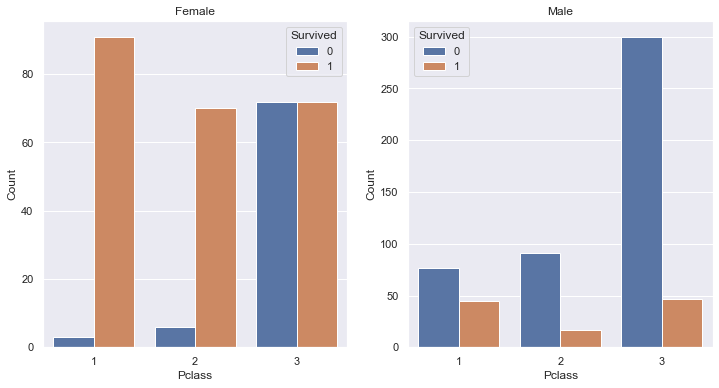

In [90]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
female_surv_barplot = sns.barplot(x='Pclass', y='Count', hue='Survived', data=female_pclass_surv, ax=axes[0])
male_surv_barplot = sns.barplot(x='Pclass', y='Count', hue='Survived', data=male_pclass_surv, ax=axes[1])

female_surv_barplot.set_title('Female')
male_surv_barplot.set_title('Male')

## Correlation heatmap

<AxesSubplot:>

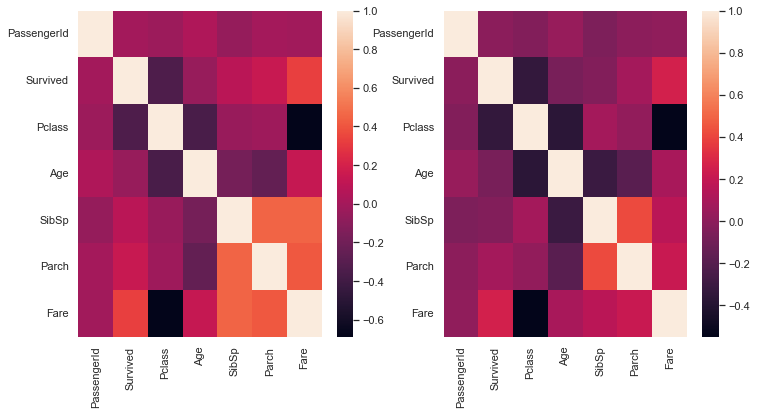

In [91]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.heatmap(data=titanic_train.corr(method='spearman'), ax=axes[0])
sns.heatmap(data=titanic_train.corr(), ax=axes[1])

## Conclusion
higher amount of people didn't survived titanic wreck
the most of survived people was females
huge amount of people with 3rd class ticket didn't survived
the most of titanic passengers was aged 20-40
women were saved first of all
fare is correlating with many features (potential exclusion?)

# Pre-processing

## Train set

### fillna() Age with median and mean

In [119]:
age_median = titanic_train['Age'].median()
age_mean = titanic_train['Age'].mean()
age_median, age_mean

(28.0, 29.69911764705882)

In [120]:
titanic_train.sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [121]:
train_median_filled = titanic_train.copy()
train_median_filled['Age'] = np.around(train_median_filled['Age'].fillna(age_median))
train_median_filled.sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.0,0,1,2625,8.5167,C
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,S
827,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,1.0,0,2,248738,29.0000,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,1.0,2,1,2666,19.2583,C
...,...,...,...,...,...,...,...,...,...,...,...
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S


In [122]:
train_mean_filled = titanic_train.copy()
train_mean_filled['Age'] = np.around(train_mean_filled['Age'].fillna(age_mean))
train_mean_filled.sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.0,0,1,2625,8.5167,C
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,S
827,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,1.0,0,2,248738,29.0000,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,1.0,2,1,2666,19.2583,C
...,...,...,...,...,...,...,...,...,...,...,...
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S


### Age engineering

In [123]:
def age_classification(column_1, column_2):
        for index in column_1.index:
                if column_1[index] in range(0, 17):
                        column_2[index] = 'Child'
                        continue
                if column_1[index] in range(17, 31):
                        column_2[index] = 'Young'
                        continue
                if column_1[index] in range(31, 46):
                        column_2[index] = 'Middle-aged'
                        continue
                else:
                        column_2[index] = 'Old-aged'

train_median_filled['Age_class'] = None
age_classification(train_median_filled['Age'], train_median_filled['Age_class'])
train_median_filled.sort_values('Age')

C:\Users\nowic\AppData\Local\Temp/ipykernel_17116/1646389755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_2[index] = 'Young'
C:\Users\nowic\AppData\Local\Temp/ipykernel_17116/1646389755.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_2[index] = 'Middle-aged'
C:\Users\nowic\AppData\Local\Temp/ipykernel_17116/1646389755.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_2[index] = 'Old-aged'
C:\Users\no

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_class
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.0,0,1,2625,8.5167,C,Child
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,S,Child
827,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,C,Child
78,79,1,2,"Caldwell, Master. Alden Gates",male,1.0,0,2,248738,29.0000,S,Child
469,470,1,3,"Baclini, Miss. Helene Barbara",female,1.0,2,1,2666,19.2583,C,Child
...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,S,Old-aged
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C,Old-aged
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C,Old-aged
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S,Old-aged


In [124]:
train_mean_filled['Age_class'] = None
age_classification(train_mean_filled['Age'], train_mean_filled['Age_class'])
train_mean_filled.sort_values('Age')

C:\Users\nowic\AppData\Local\Temp/ipykernel_17116/1646389755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_2[index] = 'Young'
C:\Users\nowic\AppData\Local\Temp/ipykernel_17116/1646389755.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_2[index] = 'Middle-aged'
C:\Users\nowic\AppData\Local\Temp/ipykernel_17116/1646389755.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_2[index] = 'Old-aged'
C:\Users\no

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_class
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.0,0,1,2625,8.5167,C,Child
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,S,Child
827,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,C,Child
78,79,1,2,"Caldwell, Master. Alden Gates",male,1.0,0,2,248738,29.0000,S,Child
469,470,1,3,"Baclini, Miss. Helene Barbara",female,1.0,2,1,2666,19.2583,C,Child
...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,S,Old-aged
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C,Old-aged
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C,Old-aged
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S,Old-aged


### Age_class survivability

<AxesSubplot:xlabel='Age_class', ylabel='Count'>

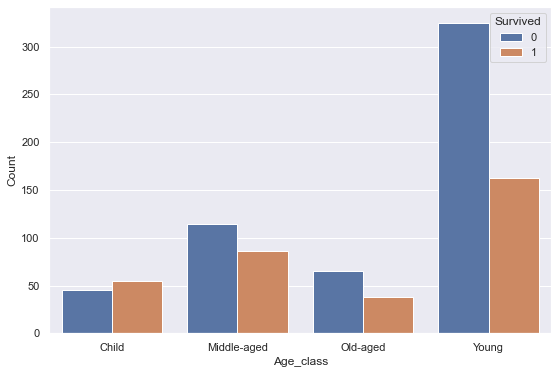

In [125]:
age_class_surv = train_median_filled.groupby(['Survived', 'Age_class'], as_index=False)\
        .agg({'Name': 'count'})\
        .rename(columns={'Name': 'Count'})

sns.barplot(x='Age_class', y='Count', hue='Survived', data=age_class_surv)

## Test set
Same as for train set

### fillna() Age with median and mean

In [65]:
titanic_test = pd.read_feather(f'{filepath}titanic_test.feather')
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [127]:
titanic_test.sort_values('Age')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
354,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.5750,S
201,1093,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,S
281,1173,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,S
307,1199,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.3500,S
250,1142,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,S
...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [126]:
test_mean_filled = titanic_test.copy()
test_mean_filled['Age'] = np.around(test_mean_filled['Age'].fillna(age_mean))
test_mean_filled.sort_values('Age')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
354,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.0,1,2,C.A. 2315,20.5750,S
201,1093,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.0,0,2,347080,14.4000,S
263,1155,3,"Klasen, Miss. Gertrud Emilia",female,1.0,1,1,350405,12.1833,S
296,1188,2,"Laroche, Miss. Louise",female,1.0,1,2,SC/Paris 2123,41.5792,C
117,1009,3,"Sandstrom, Miss. Beatrice Irene",female,1.0,1,1,PP 9549,16.7000,S
...,...,...,...,...,...,...,...,...,...,...
305,1197,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,S
179,1071,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,C
236,1128,1,"Warren, Mr. Frank Manley",male,64.0,1,0,110813,75.2500,C
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,S


In [131]:
test_median_filled = titanic_test.copy()
test_median_filled['Age'] = np.around(test_median_filled['Age'].fillna(age_median))
test_median_filled.sort_values('Age')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
201,1093,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.0,0,2,347080,14.4000,S
354,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.0,1,2,C.A. 2315,20.5750,S
307,1199,3,"Aks, Master. Philip Frank",male,1.0,0,1,392091,9.3500,S
296,1188,2,"Laroche, Miss. Louise",female,1.0,1,2,SC/Paris 2123,41.5792,C
117,1009,3,"Sandstrom, Miss. Beatrice Irene",female,1.0,1,1,PP 9549,16.7000,S
...,...,...,...,...,...,...,...,...,...,...
305,1197,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,S
179,1071,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,C
236,1128,1,"Warren, Mr. Frank Manley",male,64.0,1,0,110813,75.2500,C
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,S


### Adding Age_class column

In [133]:
test_mean_filled['Age_class'] = None
age_classification(test_mean_filled['Age'], test_mean_filled['Age_class'])
test_mean_filled.sort_values('Age')

C:\Users\nowic\AppData\Local\Temp/ipykernel_17116/1646389755.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_2[index] = 'Middle-aged'
C:\Users\nowic\AppData\Local\Temp/ipykernel_17116/1646389755.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_2[index] = 'Old-aged'
C:\Users\nowic\AppData\Local\Temp/ipykernel_17116/1646389755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_2[index] = 'Young'
C:\Users\no

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_class
354,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.0,1,2,C.A. 2315,20.5750,S,Child
201,1093,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.0,0,2,347080,14.4000,S,Child
263,1155,3,"Klasen, Miss. Gertrud Emilia",female,1.0,1,1,350405,12.1833,S,Child
296,1188,2,"Laroche, Miss. Louise",female,1.0,1,2,SC/Paris 2123,41.5792,C,Child
117,1009,3,"Sandstrom, Miss. Beatrice Irene",female,1.0,1,1,PP 9549,16.7000,S,Child
...,...,...,...,...,...,...,...,...,...,...,...
305,1197,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,S,Old-aged
179,1071,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,C,Old-aged
236,1128,1,"Warren, Mr. Frank Manley",male,64.0,1,0,110813,75.2500,C,Old-aged
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,S,Old-aged


In [132]:
test_median_filled['Age_class'] = None
age_classification(test_median_filled['Age'], test_median_filled['Age_class'])
test_median_filled.sort_values('Age')

C:\Users\nowic\AppData\Local\Temp/ipykernel_17116/1646389755.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_2[index] = 'Middle-aged'
C:\Users\nowic\AppData\Local\Temp/ipykernel_17116/1646389755.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_2[index] = 'Old-aged'
C:\Users\nowic\AppData\Local\Temp/ipykernel_17116/1646389755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_2[index] = 'Young'
C:\Users\no

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_class
201,1093,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.0,0,2,347080,14.4000,S,Child
354,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.0,1,2,C.A. 2315,20.5750,S,Child
307,1199,3,"Aks, Master. Philip Frank",male,1.0,0,1,392091,9.3500,S,Child
296,1188,2,"Laroche, Miss. Louise",female,1.0,1,2,SC/Paris 2123,41.5792,C,Child
117,1009,3,"Sandstrom, Miss. Beatrice Irene",female,1.0,1,1,PP 9549,16.7000,S,Child
...,...,...,...,...,...,...,...,...,...,...,...
305,1197,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,S,Old-aged
179,1071,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,C,Old-aged
236,1128,1,"Warren, Mr. Frank Manley",male,64.0,1,0,110813,75.2500,C,Old-aged
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,S,Old-aged


# Saving to .feather

In [134]:
train_mean_filled.to_feather('C:/Users/nowic/Desktop/home_tasks/pets/titanic/feather_data/train_mean_age.feather')
train_median_filled.to_feather('C:/Users/nowic/Desktop/home_tasks/pets/titanic/feather_data/train_median_age.feather')

test_mean_filled.to_feather('C:/Users/nowic/Desktop/home_tasks/pets/titanic/feather_data/test_mean_age.feather')
test_median_filled.to_feather('C:/Users/nowic/Desktop/home_tasks/pets/titanic/feather_data/test_median_age.feather')